In [57]:
import numpy as np
import random
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [58]:
np.random.seed(0)

In [59]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()     # images = X and labels = y

In [60]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [61]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

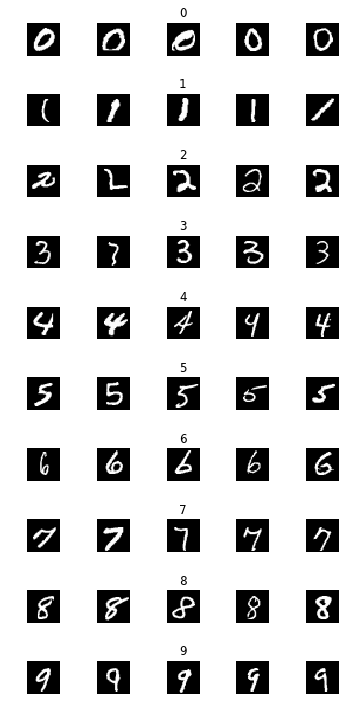

In [62]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

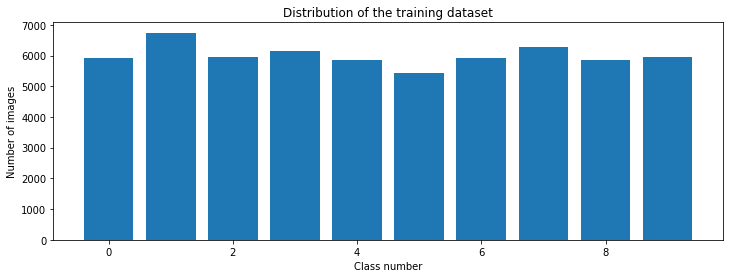

In [63]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [64]:
# one hot encoding data
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [65]:
# normalizing data
X_train = X_train /255
X_test = X_test / 255

In [66]:
# flatten images
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [67]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))  # input layer
    model.add(Dense(30, activation = 'relu')) # hidden layer
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))   # output layer
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [68]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.6466 - acc: 0.8003 - val_loss: 0.3213 - val_acc: 0.9080
Epoch 2/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.3850 - acc: 0.8891 - val_loss: 0.2837 - val_acc: 0.9172
Epoch 3/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.3393 - acc: 0.9012 - val_loss: 0.2846 - val_acc: 0.9120
Epoch 4/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.3289 - acc: 0.9039 - val_loss: 0.2743 - val_acc: 0.9168
Epoch 5/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.3144 - acc: 0.9077 - val_loss: 0.2721 - val_acc: 0.9173
Epoch 6/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.3050 - acc: 0.9096 - val_loss: 0.2567 - val_acc: 0.9255
Epoch 7/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2960 - acc: 0.9121 - val_loss: 0.2608 - val_acc:

Text(0.5,0,'epoch')

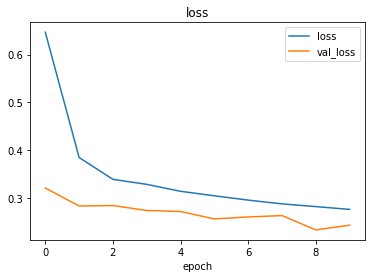

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

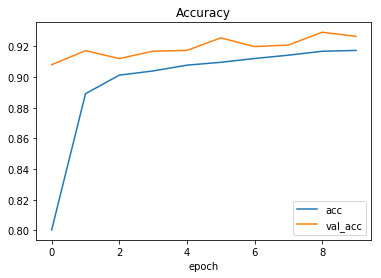

In [71]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [72]:
score = model.evaluate(X_test, y_test, verbose = 0)   # testing model with test set
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2970464165315032
Test accuracy: 0.9143


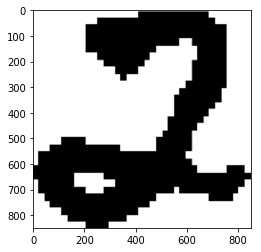

In [73]:
# using a hand written image on the web to test model
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

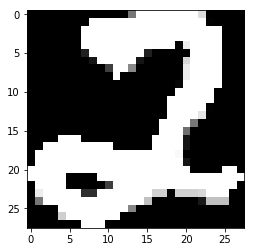

In [74]:
# preparing image for model
import cv2

img_array = np.asarray(img)      # turning image into a numpy array
resized = cv2.resize(img_array, (28, 28))   # resizing image
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)   # converting to gray scale
image = cv2.bitwise_not(gray_scale)   # converting background to black and number color to white
plt.imshow(image, cmap = plt.get_cmap('gray'))

In [75]:
# normalizing image
image = image /255
image = image.reshape(1, 784)   # flatten image

In [76]:
prediction = model.predict_classes(image)
print('Predicted digit:', str(prediction))

Predicted digit: [2]
